#Install Necessary Libraries

In [1]:
pip install pandas numpy scikit-learn matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.


#DATA PREPROCESSING

In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
import pandas as pd

# Load data
movies = pd.read_csv('movies.csv')  #
ratings = pd.read_csv('ratings.csv')

# Drop duplicates and missing values
movies.drop_duplicates(subset='movieId', inplace=True)
ratings.dropna(inplace=True)

# Handle genres: If a movie has multiple genres, split them into separate columns
movies['genres'] = movies['genres'].apply(lambda x: x.split('|'))

# Merge the movies and ratings data
data = pd.merge(ratings, movies, on='movieId')


In [6]:
# Inspect the data
print(movies.head())
print(ratings.head())

   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                              genres  
0  [Adventure, Animation, Children, Comedy, Fantasy]  
1                     [Adventure, Children, Fantasy]  
2                                  [Comedy, Romance]  
3                           [Comedy, Drama, Romance]  
4                                           [Comedy]  
   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931


##Collaborative Filtering (KNN)

# Create a User-Item Matrix (pivot table)

In [7]:
pivot_table = data.pivot_table(index='userId', columns='title', values='rating').fillna(0)


 # K-Nearest Neighbors (KNN)

In [8]:
def get_movie_recommendations(movie_name):
    if movie_name in pivot_table.columns:  # Check if movie exists in columns
        idx = pivot_table.columns.get_loc(movie_name)
        distances, indices = knn.kneighbors(pivot_table.iloc[:, idx].values.reshape(1, -1))
        recommendations = [pivot_table.columns[i] for i in indices[0][1:]]
        return recommendations
    else:
        return f"Movie '{movie_name}' not found in the dataset."  # Handle case where movie is not found

# Example: Get movie recommendations for "Star Wars (1977)"
print(get_movie_recommendations("Star Wars (1977)"))

Movie 'Star Wars (1977)' not found in the dataset.


##Content-Based Filtering (TF-IDF)

#TF-IDF Vectorization

In [9]:
# Preprocess movie features (e.g., genre)
movies['genres'] = movies['genres'].apply(lambda x: ' '.join(x)) # Join list elements into a single string
# Create a TF-IDF Vectorizer
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(movies['genres'])

In [10]:
# Compute cosine similarity between movies
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Function to get content-based recommendations
def get_content_based_recommendations(movie_name):
    # Check if movie exists in the DataFrame
    if movie_name in movies['title'].values:
        idx = movies[movies['title'] == movie_name].index[0]
        sim_scores = list(enumerate(cosine_sim[idx]))
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
        return [movies['title'].iloc[i[0]] for i in sim_scores[1:6]]
    else:
        return f"Movie '{movie_name}' not found in the dataset." # Handle case where movie is not found


In [11]:
# Test the function
print("Content-Based Recommendations for 'Toy Story (1995)':")
print(get_content_based_recommendations('Toy Story (1995)'))

Content-Based Recommendations for 'Toy Story (1995)':
['Antz (1998)', 'Toy Story 2 (1999)', 'Adventures of Rocky and Bullwinkle, The (2000)', "Emperor's New Groove, The (2000)", 'Monsters, Inc. (2001)']


##Data Analytics and Visualization

#Ratings Distribution (Histogram)

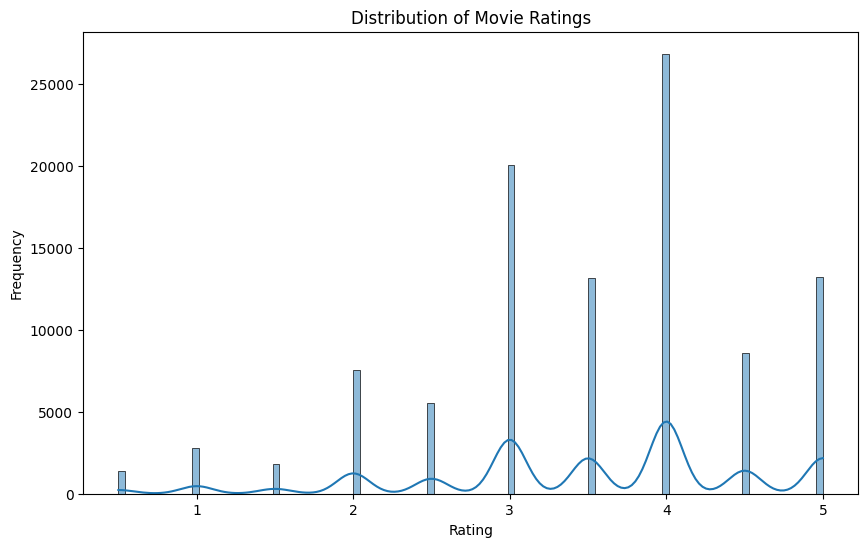

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of ratings
plt.figure(figsize=(10, 6))
sns.histplot(data['rating'], kde=True)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


#Top 10 Most Rated Movies

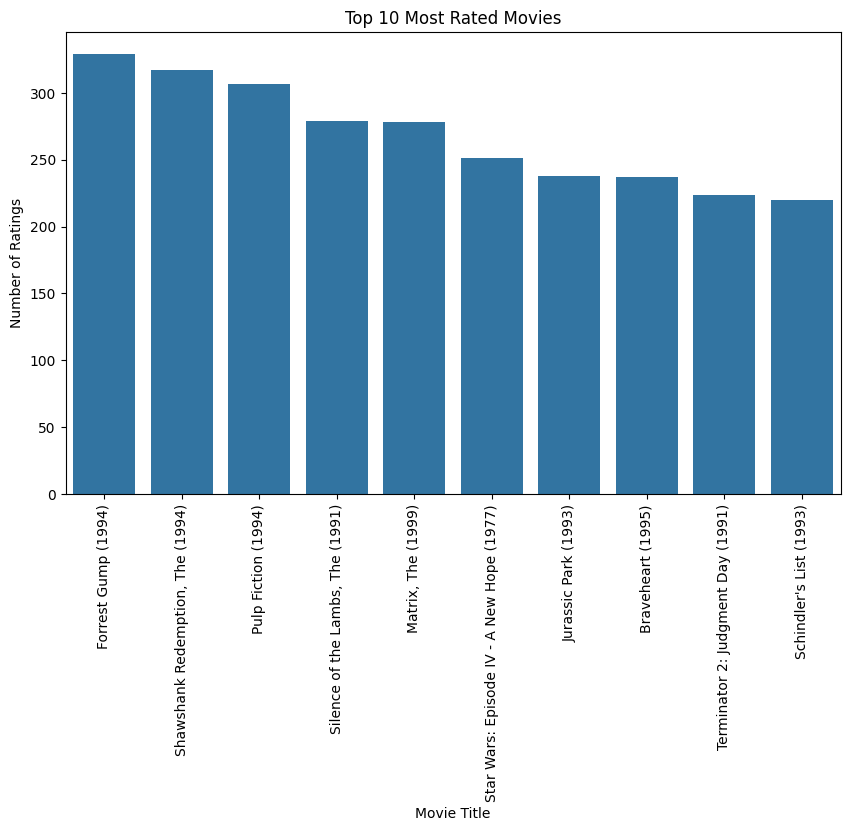

In [ ]:
top_rated_movies = data.groupby('title')['rating'].count().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_rated_movies.index, y=top_rated_movies.values)
plt.title('Top 10 Most Rated Movies')
plt.xticks(rotation=90)
plt.xlabel('Movie Title')
plt.ylabel('Number of Ratings')
plt.show()
